## riigid ja regioonid
Mis linnad ja regioonid on kõige ohutumad? Mis regioonides on üle euroopaliselt mingi kuritöö liiki kõige rohkem

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/cleanedDatasets/nan_rows/regionDatasets/region_names_changed2/police_recorded_offences_by_NUTS_3_region_new.tsv", sep="\t")

df['total'] = np.mean(df.iloc[:, 4:19].values, axis=1)
df.head(10)

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
0,A,NR,ICCS0101,Albania,88.0,82.0,118.0,124.0,126.0,107.0,...,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0,Albania,78.933333
1,A,NR,ICCS0101,Shqipëria,88.0,82.0,118.0,124.0,126.0,107.0,...,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0,Albania,78.933333
2,A,NR,ICCS0101,Veri,40.0,37.0,54.0,53.0,51.0,49.0,...,22.0,19.0,26.0,18.0,21.0,21.0,17.0,14.0,Albania,32.533333
3,A,NR,ICCS0101,Dibër,3.0,4.0,6.0,8.0,5.0,7.0,...,0.0,3.0,5.0,3.0,0.0,4.0,1.0,0.0,Albania,3.600000
4,A,NR,ICCS0101,Durrës,8.0,15.0,15.0,16.0,8.0,13.0,...,4.0,6.0,6.0,4.0,9.0,3.0,5.0,4.0,Albania,8.533333
5,A,NR,ICCS0101,Kukës,4.0,3.0,5.0,1.0,9.0,3.0,...,2.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,Albania,2.600000
6,A,NR,ICCS0101,Lezhë,6.0,9.0,10.0,14.0,11.0,15.0,...,8.0,3.0,3.0,6.0,6.0,4.0,3.0,4.0,Albania,7.400000
7,A,NR,ICCS0101,Shkodër,19.0,6.0,18.0,14.0,18.0,11.0,...,8.0,6.0,9.0,5.0,5.0,9.0,8.0,6.0,Albania,10.400000
8,A,NR,ICCS0101,Qender,24.0,24.0,36.0,34.0,32.0,35.0,...,24.0,11.0,12.0,17.0,13.0,19.0,10.0,13.0,Albania,22.466667
9,A,NR,ICCS0101,Elbasan,8.0,3.0,11.0,8.0,6.0,4.0,...,6.0,1.0,2.0,5.0,5.0,9.0,2.0,4.0,Albania,5.400000


In [4]:
def puhasta(df):
    if not df.empty:
        mask = ~df['geo'].str.startswith("Extra-Regio NUTS")
        copy_df = df[mask].copy()
        return copy_df

# Kasutame maski DataFrame'i filtreerimiseks
df = puhasta(df)

In [6]:
def leia_ohutuim(iccs, df):
    if not df.empty:
        df_new = df.loc[df['iccs']==iccs, ['geo','iccs','total','country', 'unit']]
        df_new = df_new.sort_values('total', ascending=True)
        if not df_new.empty:
            riik = df_new.iloc[0]['country']
            regioon = df_new.iloc[0]['geo']
            keskmine = df_new.iloc[0]['total']
            yhik = df_new.iloc[0]['unit']
            print(f"Ohutuim regioon on: {regioon} riigis {riik}\n")
            print(f"Keskmine kogus on: {keskmine}\n")
            print(f"Ühik on: {yhik}")
        else:
            print(df.iloc[0]['country'])
    return

leia_ohutuim("ICCS0101", df)

Ohutuim regioon on: Evrytania riigis Greece

Keskmine kogus on: 0.0

Ühik on: P_HTHAB


In [17]:
def tyhjadRead(df):
    if not df.empty:
        copy_df = df.copy(deep=True)
        for column in df.columns:
            copy_df.loc[copy_df[column]==np.nan, column] = 0
        return copy_df

def eemaldaRead(df):
    veeruNr = df.shape[1]
    mitu =  veeruNr - 5;
    print(mitu)
    if not df.empty:
        copy_df = df.copy(deep=True)
        copy_df = copy_df.dropna(thresh=mitu)
        return copy_df

df = eemaldaRead(tyhjadRead(df))

leia_ohutuim("ICCS0101", df)

17
Ohutuim regioon on: Evrytania riigis Greece

Keskmine kogus on: 0.0

Ühik on: P_HTHAB


In [8]:
def leia_ohtlikuim(iccs, df):
    df_new = df.loc[df['iccs']==iccs, ['geo','iccs','total','country', 'unit']]
    df_new = df_new.sort_values('total', ascending=False)
    riik = df_new.iloc[0]['country']
    regioon = df_new.iloc[0]['geo']
    keskmine = df_new.iloc[0]['total']
    yhik = df_new.iloc[0]['unit']
    print(f"Kõige ohtlikum regioon on: {regioon} riigis {riik}\n")
    print(f"Keskmine kogus on: {keskmine}\n")
    print(f"Ühik on: {yhik}")
    return

leia_ohtlikuim("ICCS0101", df)


Kõige ohtlikum regioon on: Türkiye riigis Turkey

Keskmine kogus on: 2032.4

Ühik on: NR


In [18]:
#loon kaks dataframe'i, ühed kus unit on NR ja teised kus unit on P_HTHAB (per hundred thousand habitants)
df1 = df.loc[df['unit']=='NR']
df2 = df.loc[df['unit']=='P_HTHAB']

unikaalsed_riigid = df1['country'].unique()
countries1 = {}

for riik in unikaalsed_riigid:
    # Filtreerime algse DataFrame'i ainult selle riigi ridade järgi
    alamtabel = df1[df1['country'] == riik].copy()

    # Salvestame alamtabeli sõnastikku
    countries1[riik] = alamtabel

    print(f"Loodi alamtabel riigile: {riik}. Ridade arv: {len(alamtabel)}")

Loodi alamtabel riigile: Albania. Ridade arv: 68
Loodi alamtabel riigile: Austria. Ridade arv: 288
Loodi alamtabel riigile: Bosnia and Herzegovina. Ridade arv: 4
Loodi alamtabel riigile: Belgium. Ridade arv: 413
Loodi alamtabel riigile: Bulgaria. Ridade arv: 185
Loodi alamtabel riigile: Switzerland. Ridade arv: 245
Loodi alamtabel riigile: Cyprus. Ridade arv: 16
Loodi alamtabel riigile: Denmark. Ridade arv: 126
Loodi alamtabel riigile: Greece. Ridade arv: 384
Loodi alamtabel riigile: Spain. Ridade arv: 602
Loodi alamtabel riigile: Iceland. Ridade arv: 30
Loodi alamtabel riigile: Italy. Ridade arv: 642
Loodi alamtabel riigile: Liechtenstein. Ridade arv: 16
Loodi alamtabel riigile: Lithuania. Ridade arv: 70
Loodi alamtabel riigile: Luxembourg. Ridade arv: 16
Loodi alamtabel riigile: Montenegro. Ridade arv: 16
Loodi alamtabel riigile: Malta. Ridade arv: 35
Loodi alamtabel riigile: Norway. Ridade arv: 108
Loodi alamtabel riigile: Portugal. Ridade arv: 252
Loodi alamtabel riigile: Serbia. R

In [10]:

kuriteod = df['iccs'].unique()
print(kuriteod)

['ICCS0101' 'ICCS02011' 'ICCS0401' 'ICCS0501' 'ICCS05012' 'ICCS0502'
 'ICCS050211']


In [19]:
unikaalsed_riigid2 = df2['country'].unique()
countries2 = {}

for riik in unikaalsed_riigid2:
    # Filtreerime algse DataFrame'i ainult selle riigi ridade järgi
    alamtabel = df2[df2['country'] == riik].copy()

    # Salvestame alamtabeli sõnastikku
    countries2[riik] = alamtabel

    print(f"Loodi alamtabel riigile: {riik}. Ridade arv: {len(alamtabel)}")

Loodi alamtabel riigile: Albania. Ridade arv: 38
Loodi alamtabel riigile: Austria. Ridade arv: 288
Loodi alamtabel riigile: Bosnia and Herzegovina. Ridade arv: 3
Loodi alamtabel riigile: Belgium. Ridade arv: 357
Loodi alamtabel riigile: Bulgaria. Ridade arv: 185
Loodi alamtabel riigile: Switzerland. Ridade arv: 245
Loodi alamtabel riigile: Cyprus. Ridade arv: 16
Loodi alamtabel riigile: Denmark. Ridade arv: 126
Loodi alamtabel riigile: Greece. Ridade arv: 384
Loodi alamtabel riigile: Spain. Ridade arv: 602
Loodi alamtabel riigile: Iceland. Ridade arv: 30
Loodi alamtabel riigile: Italy. Ridade arv: 642
Loodi alamtabel riigile: Liechtenstein. Ridade arv: 16
Loodi alamtabel riigile: Lithuania. Ridade arv: 70
Loodi alamtabel riigile: Luxembourg. Ridade arv: 16
Loodi alamtabel riigile: Montenegro. Ridade arv: 16
Loodi alamtabel riigile: Malta. Ridade arv: 35
Loodi alamtabel riigile: Norway. Ridade arv: 104
Loodi alamtabel riigile: Portugal. Ridade arv: 252
Loodi alamtabel riigile: Serbia. R

In [20]:

for riik in countries1:
    leia_ohutuim('ICCS0101',countries1[riik])

Ohutuim regioon on: Gjirokastër riigis Albania

Keskmine kogus on: 1.8666666666666667

Ühik on: NR
Ohutuim regioon on: Lungau riigis Austria

Keskmine kogus on: 0.0

Ühik on: NR
Ohutuim regioon on: Bosnia and Herzegovina riigis Bosnia and Herzegovina

Keskmine kogus on: 46.86666666666667

Ühik on: NR
Ohutuim regioon on: Arr. Diksmuide riigis Belgium

Keskmine kogus on: 0.26666666666666666

Ühik on: NR
Ohutuim regioon on: Smolyan riigis Bulgaria

Keskmine kogus on: 1.0

Ühik on: NR
Ohutuim regioon on: Switzerland riigis Switzerland

Keskmine kogus on: nan

Ühik on: NR
Ohutuim regioon on: Cyprus riigis Cyprus

Keskmine kogus on: 11.733333333333333

Ühik on: NR
Ohutuim regioon on: Bornholm riigis Denmark

Keskmine kogus on: 0.4

Ühik on: NR
Ohutuim regioon on: Evrytania riigis Greece

Keskmine kogus on: 0.0

Ühik on: NR
Ohutuim regioon on: El Hierro riigis Spain

Keskmine kogus on: 0.06666666666666667

Ühik on: NR
Ohutuim regioon on: Landsbyggð riigis Iceland

Keskmine kogus on: 0.6666666

In [21]:
df1.loc[df1['geo']=='Switzerland']


,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
168,A,NR,ICCS0101,Switzerland,NaN,51.0,52.0,46.0,45.0,57.0,...,45.0,45.0,50.0,46.0,47.0,42.0,42.0,53.0,Switzerland,NaN
1922,A,NR,ICCS02011,Switzerland,NaN,24478.0,23491.0,22153.0,21992.0,21923.0,...,21228.0,21188.0,22225.0,23087.0,23050.0,21651.0,23364.0,23735.0,Switzerland,NaN
3580,A,NR,ICCS0401,Switzerland,NaN,3530.0,2853.0,3113.0,3603.0,3196.0,...,1876.0,1746.0,1643.0,1872.0,1949.0,1736.0,1941.0,1930.0,Switzerland,NaN
5437,A,NR,ICCS0501,Switzerland,NaN,64268.0,62243.0,65172.0,73714.0,68730.0,...,46539.0,41351.0,38871.0,36418.0,32819.0,31186.0,35732.0,41429.0,Switzerland,NaN
7080,A,NR,ICCS05012,Switzerland,NaN,NaN,NaN,NaN,42491.0,39672.0,...,26948.0,24081.0,23426.0,21351.0,18405.0,18234.0,20788.0,24763.0,Switzerland,NaN
8838,A,NR,ICCS0502,Switzerland,NaN,180501.0,170792.0,199652.0,211248.0,193327.0,...,142370.0,137368.0,131545.0,132646.0,121322.0,117585.0,138970.0,168575.0,Switzerland,NaN
10697,A,NR,ICCS050211,Switzerland,NaN,8449.0,7557.0,7475.0,7644.0,6267.0,...,6024.0,6617.0,7606.0,8675.0,9631.0,12562.0,18698.0,26890.0,Switzerland,NaN


In [14]:
eemaldaRead(tyhjadRead(df1))

17


,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
0,A,NR,ICCS0101,Albania,88.0,82.0,118.0,124.0,126.0,107.0,...,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0,Albania,78.933333
1,A,NR,ICCS0101,Shqipëria,88.0,82.0,118.0,124.0,126.0,107.0,...,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0,Albania,78.933333
2,A,NR,ICCS0101,Veri,40.0,37.0,54.0,53.0,51.0,49.0,...,22.0,19.0,26.0,18.0,21.0,21.0,17.0,14.0,Albania,32.533333
3,A,NR,ICCS0101,Dibër,3.0,4.0,6.0,8.0,5.0,7.0,...,0.0,3.0,5.0,3.0,0.0,4.0,1.0,0.0,Albania,3.600000
4,A,NR,ICCS0101,Durrës,8.0,15.0,15.0,16.0,8.0,13.0,...,4.0,6.0,6.0,4.0,9.0,3.0,5.0,4.0,Albania,8.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12332,A,NR,ICCS050211,"Mardin, Batman, Şırnak, Siirt",172.0,199.0,224.0,180.0,378.0,624.0,...,842.0,525.0,434.0,411.0,436.0,365.0,324.0,285.0,Turkey,462.400000
12333,A,NR,ICCS050211,Mardin,49.0,59.0,57.0,46.0,106.0,193.0,...,241.0,125.0,119.0,110.0,109.0,62.0,77.0,112.0,Turkey,126.200000
12334,A,NR,ICCS050211,Batman,67.0,87.0,55.0,79.0,163.0,288.0,...,524.0,324.0,242.0,238.0,240.0,240.0,189.0,138.0,Turkey,240.600000
12335,A,NR,ICCS050211,Şırnak,41.0,40.0,103.0,48.0,87.0,110.0,...,36.0,26.0,28.0,22.0,25.0,29.0,27.0,24.0,Turkey,61.533333


In [22]:
df1 = df1.fillna(0)

In [23]:
df1.loc[df1['geo']=='Switzerland']

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
168,A,NR,ICCS0101,Switzerland,0.0,51.0,52.0,46.0,45.0,57.0,...,45.0,45.0,50.0,46.0,47.0,42.0,42.0,53.0,Switzerland,0.0
1922,A,NR,ICCS02011,Switzerland,0.0,24478.0,23491.0,22153.0,21992.0,21923.0,...,21228.0,21188.0,22225.0,23087.0,23050.0,21651.0,23364.0,23735.0,Switzerland,0.0
3580,A,NR,ICCS0401,Switzerland,0.0,3530.0,2853.0,3113.0,3603.0,3196.0,...,1876.0,1746.0,1643.0,1872.0,1949.0,1736.0,1941.0,1930.0,Switzerland,0.0
5437,A,NR,ICCS0501,Switzerland,0.0,64268.0,62243.0,65172.0,73714.0,68730.0,...,46539.0,41351.0,38871.0,36418.0,32819.0,31186.0,35732.0,41429.0,Switzerland,0.0
7080,A,NR,ICCS05012,Switzerland,0.0,0.0,0.0,0.0,42491.0,39672.0,...,26948.0,24081.0,23426.0,21351.0,18405.0,18234.0,20788.0,24763.0,Switzerland,0.0
8838,A,NR,ICCS0502,Switzerland,0.0,180501.0,170792.0,199652.0,211248.0,193327.0,...,142370.0,137368.0,131545.0,132646.0,121322.0,117585.0,138970.0,168575.0,Switzerland,0.0
10697,A,NR,ICCS050211,Switzerland,0.0,8449.0,7557.0,7475.0,7644.0,6267.0,...,6024.0,6617.0,7606.0,8675.0,9631.0,12562.0,18698.0,26890.0,Switzerland,0.0


In [24]:
df1['total'] = np.mean(df1.iloc[:, 4:19].values, axis=1)
df1.loc[df1['geo']=='Switzerland']

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
168,A,NR,ICCS0101,Switzerland,0.0,51.0,52.0,46.0,45.0,57.0,...,45.0,45.0,50.0,46.0,47.0,42.0,42.0,53.0,Switzerland,44.400000
1922,A,NR,ICCS02011,Switzerland,0.0,24478.0,23491.0,22153.0,21992.0,21923.0,...,21228.0,21188.0,22225.0,23087.0,23050.0,21651.0,23364.0,23735.0,Switzerland,20729.466667
3580,A,NR,ICCS0401,Switzerland,0.0,3530.0,2853.0,3113.0,3603.0,3196.0,...,1876.0,1746.0,1643.0,1872.0,1949.0,1736.0,1941.0,1930.0,Switzerland,2218.800000
5437,A,NR,ICCS0501,Switzerland,0.0,64268.0,62243.0,65172.0,73714.0,68730.0,...,46539.0,41351.0,38871.0,36418.0,32819.0,31186.0,35732.0,41429.0,Switzerland,47553.466667
7080,A,NR,ICCS05012,Switzerland,0.0,0.0,0.0,0.0,42491.0,39672.0,...,26948.0,24081.0,23426.0,21351.0,18405.0,18234.0,20788.0,24763.0,Switzerland,20183.733333
8838,A,NR,ICCS0502,Switzerland,0.0,180501.0,170792.0,199652.0,211248.0,193327.0,...,142370.0,137368.0,131545.0,132646.0,121322.0,117585.0,138970.0,168575.0,Switzerland,146806.533333
10697,A,NR,ICCS050211,Switzerland,0.0,8449.0,7557.0,7475.0,7644.0,6267.0,...,6024.0,6617.0,7606.0,8675.0,9631.0,12562.0,18698.0,26890.0,Switzerland,8003.466667


In [25]:
for riik in countries1:
    leia_ohutuim('ICCS0101',countries1[riik])

Ohutuim regioon on: Gjirokastër riigis Albania

Keskmine kogus on: 1.8666666666666667

Ühik on: NR
Ohutuim regioon on: Lungau riigis Austria

Keskmine kogus on: 0.0

Ühik on: NR
Ohutuim regioon on: Bosnia and Herzegovina riigis Bosnia and Herzegovina

Keskmine kogus on: 46.86666666666667

Ühik on: NR
Ohutuim regioon on: Arr. Diksmuide riigis Belgium

Keskmine kogus on: 0.26666666666666666

Ühik on: NR
Ohutuim regioon on: Smolyan riigis Bulgaria

Keskmine kogus on: 1.0

Ühik on: NR
Ohutuim regioon on: Switzerland riigis Switzerland

Keskmine kogus on: nan

Ühik on: NR
Ohutuim regioon on: Cyprus riigis Cyprus

Keskmine kogus on: 11.733333333333333

Ühik on: NR
Ohutuim regioon on: Bornholm riigis Denmark

Keskmine kogus on: 0.4

Ühik on: NR
Ohutuim regioon on: Evrytania riigis Greece

Keskmine kogus on: 0.0

Ühik on: NR
Ohutuim regioon on: El Hierro riigis Spain

Keskmine kogus on: 0.06666666666666667

Ühik on: NR
Ohutuim regioon on: Landsbyggð riigis Iceland

Keskmine kogus on: 0.6666666

In [26]:
unikaalsed_riigid = df1['country'].unique()
countries1 = {}

for riik in unikaalsed_riigid:
    # Filtreerime algse DataFrame'i ainult selle riigi ridade järgi
    alamtabel = df1[df1['country'] == riik].copy()

    # Salvestame alamtabeli sõnastikku
    countries1[riik] = alamtabel

    print(f"Loodi alamtabel riigile: {riik}. Ridade arv: {len(alamtabel)}")

Loodi alamtabel riigile: Albania. Ridade arv: 68
Loodi alamtabel riigile: Austria. Ridade arv: 288
Loodi alamtabel riigile: Bosnia and Herzegovina. Ridade arv: 4
Loodi alamtabel riigile: Belgium. Ridade arv: 413
Loodi alamtabel riigile: Bulgaria. Ridade arv: 185
Loodi alamtabel riigile: Switzerland. Ridade arv: 245
Loodi alamtabel riigile: Cyprus. Ridade arv: 16
Loodi alamtabel riigile: Denmark. Ridade arv: 126
Loodi alamtabel riigile: Greece. Ridade arv: 384
Loodi alamtabel riigile: Spain. Ridade arv: 602
Loodi alamtabel riigile: Iceland. Ridade arv: 30
Loodi alamtabel riigile: Italy. Ridade arv: 642
Loodi alamtabel riigile: Liechtenstein. Ridade arv: 16
Loodi alamtabel riigile: Lithuania. Ridade arv: 70
Loodi alamtabel riigile: Luxembourg. Ridade arv: 16
Loodi alamtabel riigile: Montenegro. Ridade arv: 16
Loodi alamtabel riigile: Malta. Ridade arv: 35
Loodi alamtabel riigile: Norway. Ridade arv: 108
Loodi alamtabel riigile: Portugal. Ridade arv: 252
Loodi alamtabel riigile: Serbia. R

In [27]:
for riik in countries1:
    leia_ohutuim('ICCS02011',countries1[riik])

Albania
Ohutuim regioon on: Lungau riigis Austria

Keskmine kogus on: 71.0

Ühik on: NR
Bosnia and Herzegovina
Ohutuim regioon on: Arr. Diksmuide riigis Belgium

Keskmine kogus on: 179.26666666666668

Ühik on: NR
Ohutuim regioon on: Smolyan riigis Bulgaria

Keskmine kogus on: 21.0

Ühik on: NR
Ohutuim regioon on: Appenzell Innerrhoden riigis Switzerland

Keskmine kogus on: 22.933333333333334

Ühik on: NR
Cyprus
Ohutuim regioon on: Bornholm riigis Denmark

Keskmine kogus on: 81.06666666666666

Ühik on: NR
Greece
Ohutuim regioon on: El Hierro riigis Spain

Keskmine kogus on: 24.733333333333334

Ühik on: NR
Ohutuim regioon on: Landsbyggð riigis Iceland

Keskmine kogus on: 392.6666666666667

Ühik on: NR
Ohutuim regioon on: Isernia riigis Italy

Keskmine kogus on: 98.2

Ühik on: NR
Liechtenstein
Ohutuim regioon on: Tauragės apskritis riigis Lithuania

Keskmine kogus on: 297.4

Ühik on: NR
Luxembourg
Montenegro
Ohutuim regioon on: Gozo and Comino/Għawdex u Kemmuna riigis Malta

Keskmine kogu

In [28]:
for riik in countries1:
    print(countries1[riik].shape)

(68, 22)
(288, 22)
(4, 22)
(413, 22)
(185, 22)
(245, 22)
(16, 22)
(126, 22)
(384, 22)
(602, 22)
(30, 22)
(642, 22)
(16, 22)
(70, 22)
(16, 22)
(16, 22)
(35, 22)
(108, 22)
(252, 22)
(192, 22)
(80, 22)
(98, 22)
(840, 22)
(4, 22)
(120, 22)
(135, 22)
(342, 22)
(198, 22)
(9, 22)


In [29]:
df1 = df1.sort_values('total', ascending=True)
df1.head(10)

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
53,A,NR,ICCS0101,Lungau,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austria,0.000000
782,A,NR,ICCS0101,Evrytania,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Greece,0.000000
198,A,NR,ICCS0101,Obwalden,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Switzerland,0.000000
190,A,NR,ICCS0101,Appenzell Innerrhoden,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Switzerland,0.000000
189,A,NR,ICCS0101,Appenzell Ausserrhoden,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Switzerland,0.066667
59,A,NR,ICCS0101,Osttirol,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austria,0.066667
1604,A,NR,ICCS0101,Pomurska,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Slovenia,0.066667
868,A,NR,ICCS0101,El Hierro,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spain,0.066667
1611,A,NR,ICCS0101,Primorsko-notranjska,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Slovenia,0.133333
196,A,NR,ICCS0101,Uri,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Switzerland,0.133333


In [30]:
df1 = df1.sort_values('total', ascending=False)
df1.head(50)

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,country,total
9813,A,NR,ICCS0502,Italy,1241088.0,1166720.0,0.0,0.0,0.0,1302858.0,...,1132094.0,1069366.0,1001218.0,906447.0,612177.0,686863.0,829230.0,0.0,Italy,832868.600000
10340,A,NR,ICCS0502,Sweden,456634.0,448501.0,426696.0,442686.0,437238.0,439409.0,...,406178.0,388035.0,358674.0,351677.0,331709.0,308013.0,317041.0,287940.0,Sweden,399137.800000
3292,A,NR,ICCS02011,Türkiye,154041.0,179476.0,201427.0,208676.0,245516.0,259789.0,...,274623.0,287420.0,307548.0,311469.0,296382.0,327388.0,367394.0,365905.0,Turkey,265045.533333
9991,A,NR,ICCS0502,Netherlands,0.0,0.0,379463.0,392912.0,392777.0,391946.0,...,304064.0,258911.0,233992.0,233862.0,204749.0,183953.0,233052.0,245454.0,Netherlands,260678.133333
8739,A,NR,ICCS0502,Belgium,319578.0,309862.0,313403.0,329211.0,316585.0,293542.0,...,232504.0,223563.0,222049.0,227379.0,157190.0,167303.0,199703.0,205003.0,Belgium,255536.466667
9814,A,NR,ICCS0502,Nord-Ovest,388317.0,374965.0,0.0,0.0,0.0,405903.0,...,345991.0,320694.0,298326.0,268323.0,172708.0,210778.0,254779.0,0.0,Italy,254049.266667
9363,A,NR,ICCS0502,Denmark,297206.0,300515.0,292350.0,291387.0,281515.0,269086.0,...,225511.0,213924.0,182819.0,170043.0,142042.0,124628.0,146613.0,158491.0,Denmark,227618.666667
9364,A,NR,ICCS0502,Danmark,295084.0,298696.0,290691.0,289716.0,279929.0,267208.0,...,221557.0,209676.0,179653.0,167559.0,140685.0,123527.0,145355.0,151400.0,Denmark,225330.933333
10409,A,NR,ICCS0502,Türkiye,118066.0,0.0,193340.0,199237.0,224794.0,247576.0,...,266260.0,298887.0,250529.0,216554.0,197899.0,209990.0,242048.0,181636.0,Turkey,214304.066667
9915,A,NR,ICCS0502,Centro (IT),272677.0,252142.0,0.0,0.0,0.0,299114.0,...,257947.0,255204.0,236842.0,213580.0,140493.0,159743.0,197652.0,0.0,Italy,192243.533333


Oke trallaleelotatud on päris korralikult
nüüd on aeg päriselt mingid eesmärgid seada

Leian, iga kuritöö kategooria kohta, mis on kõige ohutum riik
Leian iga riigi kohta selle kõige ohutuma piirkonna või vähima kuritegevuse arvuga vaadates igat kuritöö kategooriat
Salvestan leitud andmed eraldi tabelisse ja loon mingi graafiku, mis visualiseerib ja võrdleb neid riike omavahel

Leian sama ka kõige ohtlikumate piirkondade kohta

Leian ka kõige madalama kuritöö arvuga aastad regioonides
Oot see vist polnud mu ülesanne

Okei äkki mul on võimalik välja selgitada sellised regioonid, millel alguses oli väga palju kuritegevust, aga hiljem see langes
Ja sama ka vastupidi

Peab meeles hoidma, et police recorded offences ei tähenda, et nad kõik ka päriselt süüdi olid, need on lihtsalt politsei ülesmärkimised.

In [1]:
!pip install geopandas wget mapclassify descartes

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached wget-3.2.zip (10 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mapclassify-2.10.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached descartes-1.1.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Usin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import geopandas as gpd

europe_map_gdf = gpd.read_file("../assets/NUTS_RG_03M_2024_3035.gpkg")
crime_df = pd.read_csv("../data/cleanedDatasets/nan_rows/regionDatasets/police_recorded_offences_by_NUTS_3_region_new.tsv", sep="\t")
europe_map_gdf.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
0,AL011,3,AL,Dibër,Dibër,NaN,NaN,NaN,"POLYGON ((5169746.713 2142724.535, 5172577.864..."
1,AL012,3,AL,Durrës,Durrës,NaN,NaN,NaN,"POLYGON ((5118781.291 2103409.375, 5124125.952..."
2,AL013,3,AL,Kukës,Kukës,NaN,NaN,NaN,"POLYGON ((5151103.598 2214195.531, 5156101.41 ..."
3,AL014,3,AL,Lezhë,Lezhë,NaN,NaN,NaN,"POLYGON ((5112296.856 2131907.92, 5112796.854 ..."
4,AL015,3,AL,Shkodër,Shkodër,NaN,NaN,NaN,"POLYGON ((5100056.794 2130793.954, 5099849.26 ..."


In [34]:
crime_df.head()

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,NR,ICCS0101,AL,88.0,82.0,118.0,124.0,126.0,107.0,98.0,54.0,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0
1,A,NR,ICCS0101,AL0,88.0,82.0,118.0,124.0,126.0,107.0,98.0,54.0,71.0,52.0,51.0,58.0,52.0,61.0,42.0,34.0
2,A,NR,ICCS0101,AL01,40.0,37.0,54.0,53.0,51.0,49.0,41.0,19.0,22.0,19.0,26.0,18.0,21.0,21.0,17.0,14.0
3,A,NR,ICCS0101,AL011,3.0,4.0,6.0,8.0,5.0,7.0,4.0,1.0,0.0,3.0,5.0,3.0,0.0,4.0,1.0,0.0
4,A,NR,ICCS0101,AL012,8.0,15.0,15.0,16.0,8.0,13.0,11.0,5.0,4.0,6.0,6.0,4.0,9.0,3.0,5.0,4.0


In [ ]:
#seon tabelid kokku ühendades need NUTS koodi järgi
map_key = "NUTS_ID"
data_key = "geo"

crime_geo_data = europe_map_gdf.merge(
    crime_df, left_on=map_key, right_on=data_key, how="left"
)

In [35]:
#loon kaks dataframe'i, ühed kus unit on NR ja teised kus unit on P_HTHAB (per hundred thousand habitants)
df1 = crime_df.loc[crime_df['unit']=='NR']
df2 = crime_df.loc[crime_df['unit']=='P_HTHAB']

kuriteod = crime_df['iccs'].unique()
iccs_uNR = {} #kuritöö järgi tabelid kus ühikuks on kogu arv
iccs_uP = {} #kuritöö järgi tabelid kus ühikuks on P_HTHAB ehk crime rate per hundred thousand habitants

for kood in kuriteod:
    # Filtreerime algse DataFrame'i ainult selle koodi ridade järgi
    alamtabel = df1[df1['iccs'] == kood].copy()
    alamtabel2 = df2[df2['iccs'] == kood].copy()

    # Salvestame alamtabeli sõnastikku
    iccs_uNR[kood] = alamtabel
    iccs_uP[kood] = alamtabel2


In [44]:
europe_map_gdf2 = gpd.read_file("../assets/NUTS_RG_10M_2024_3035.gpkg")

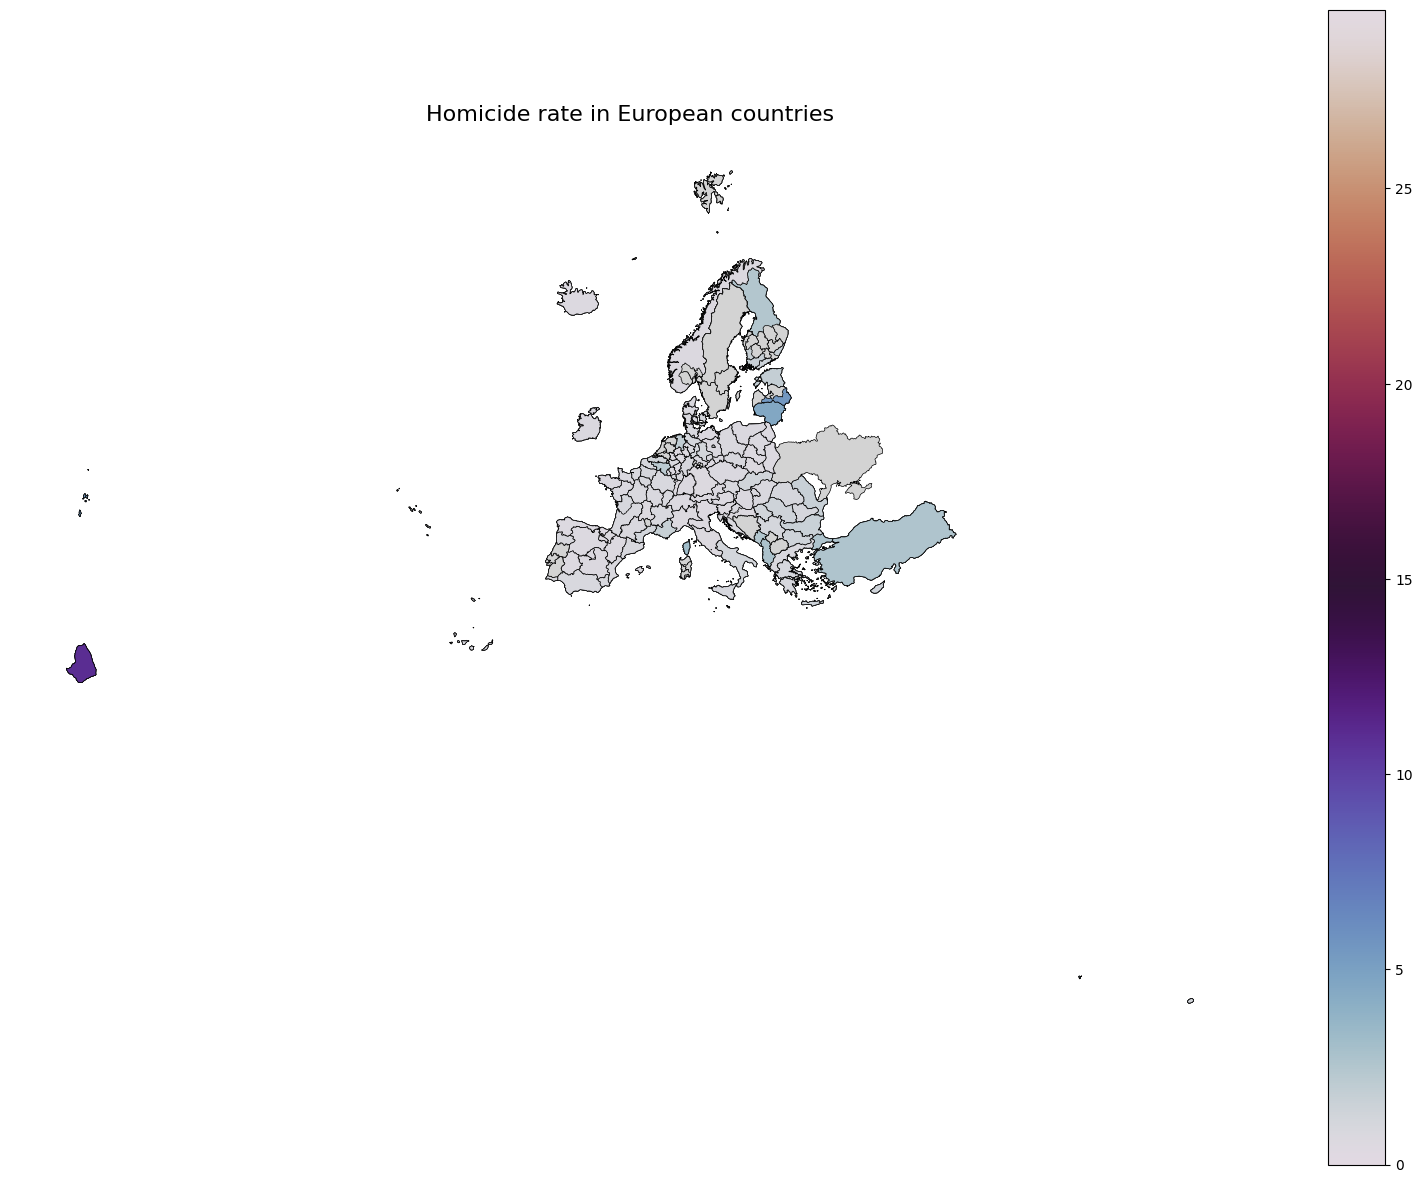

In [45]:
import matplotlib.pyplot as plt

homicide_df_uP = iccs_uP["ICCS0101"].copy()
homicide_df_uP['total'] = homicide_df_uP.iloc[:, 4:19].mean(axis=1, skipna=True)
homicide_df_uP_narrow = homicide_df_uP[["unit","iccs","total","geo"]]
map_key = "NUTS_ID"
data_key = "geo"
homicide_geo_data = europe_map_gdf2.merge(
    homicide_df_uP_narrow, left_on=map_key, right_on=data_key, how="left"
)
# The column we want to plot is now part of the GeoDataFrame
column = 'total'

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Create the map
homicide_geo_data.plot(
    column=column,  # The column to use for color-coding
    ax=ax,
    legend=True,             # Display the color legend
    cmap='twilight',           # Choose a color map (e.g., Red-Yellow-Green for variance)
    missing_kwds={           # Style for countries that didn't have a matching data value (NaN)
        "color": "lightgrey",
        "edgecolor": "black",
        "label": "No Data"
    },
    edgecolor='black',       # Country border color
    linewidth=0.5
)

# Clean up the plot
ax.set_title('Homicide rate in European countries', fontdict={'fontsize': '16', 'fontweight': '3'})
ax.set_axis_off() # Remove the latitude and longitude axes
plt.show()


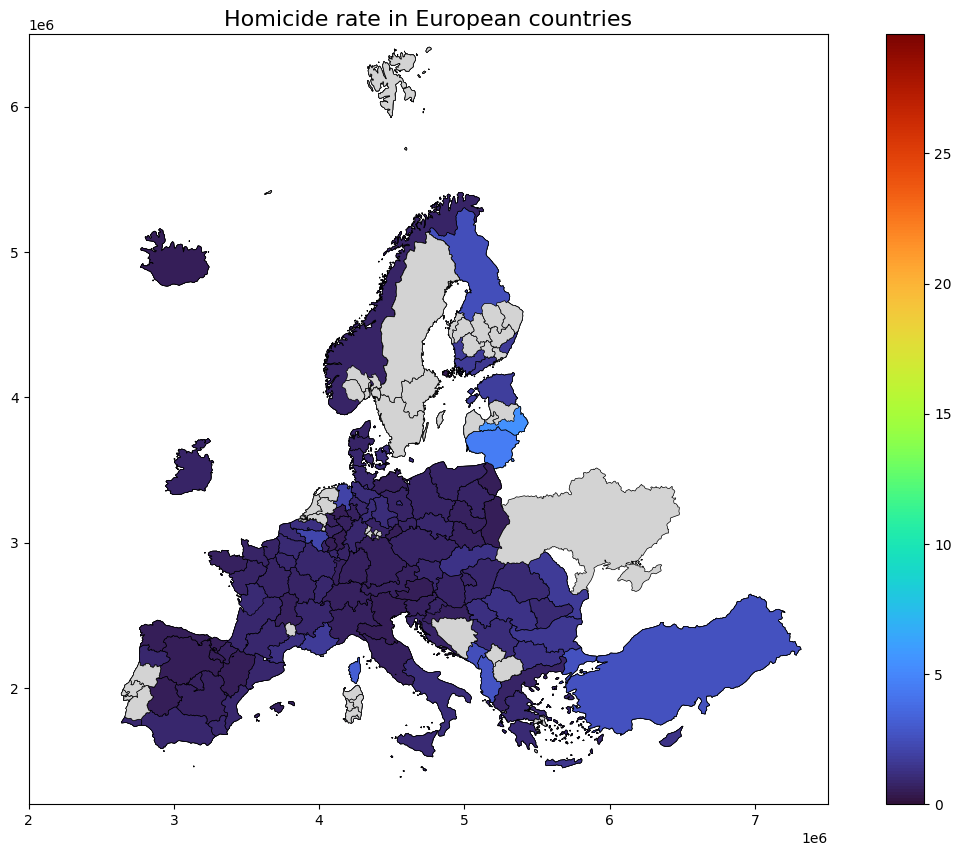

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create the map
homicide_geo_data.plot(
    column=column,  # The column to use for color-coding
    ax=ax,
    legend=True,             # Display the color legend
    cmap='turbo',           # Choose a color map (e.g., Red-Yellow-Green for variance)
    missing_kwds={           # Style for countries that didn't have a matching data value (NaN)
        "color": "lightgrey",
        "edgecolor": "black",
        "label": "No Data"
    },
    edgecolor='black',       # Country border color
    linewidth=0.5
)
ax.set_xlim(2000000, 7500000)

# Set the Y-axis limits (North-South extent)
ax.set_ylim(1200000, 6500000)
# Clean up the plot
ax.set_title('Homicide rate in European countries', fontdict={'fontsize': '16', 'fontweight': '3'})
#ax.set_axis_off() # Remove the latitude and longitude axes
plt.show()

In [41]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',